In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [30]:
df=pd.read_csv("E:\Susmita_Backup\Data Science Course\Data Science Assignment\KNN\Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [31]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [32]:
df.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [33]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
#To Remove Outliers

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
clf=IsolationForest(random_state=10,contamination=0.01)
clf.fit(df.iloc[:,1:])

IsolationForest(contamination=0.01, random_state=10)

In [36]:
pred_outlier=clf.predict(df.iloc[:,1:])
pred_outlier

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [37]:
df['Anomaly']=clf.predict(df.iloc[:,1:])

In [38]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,Anomaly
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,1
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,1


In [39]:
df[df['Anomaly']==-1]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,Anomaly
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,-1


In [40]:
data=df.drop(df.index[72],axis=0).reset_index()

In [41]:
data

,index,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,Anomaly
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
3,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1
96,97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,1
97,98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
98,99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,1


In [42]:
data=data.drop(['index','Anomaly'],axis=1)

In [43]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
#Using Train Test Split

In [44]:
x=data.iloc[:,1:17]
y=data.iloc[:,-1]

In [47]:
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [48]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((70, 16), (30, 16), (70,), (30,))

In [65]:
model=KNeighborsClassifier(n_neighbors=1)

In [66]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [67]:
pred=model.predict(Xtest)
pred

array([5, 2, 4, 1, 4, 1, 2, 1, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1, 1, 2, 2, 7], dtype=int64)

In [68]:
model.score(Xtest,ytest)

0.9666666666666667

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [70]:
acc=accuracy_score(ytest,pred)
print('Accuracy=',acc)
print(classification_report(ytest,pred))

Accuracy= 0.9666666666666667
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      0.50      0.67         2
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        30
   macro avg       0.96      0.93      0.93        30
weighted avg       0.97      0.97      0.96        30



In [71]:
result=pd.DataFrame({'ytest':ytest,'y_pred':pred})
result

,ytest,y_pred
26,5,5
86,2,2
2,4,4
55,1,1
75,3,4
93,1,1
16,2,2
73,1,1
54,1,1
95,1,1


In [72]:
pred1=model.predict(x)
pred1

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 4, 1, 1, 4, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2, 6,
       5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [73]:
pd.Series(pred1).value_counts()

1    41
2    20
4    14
7     9
6     8
5     4
3     4
dtype: int64

In [74]:
acc1=accuracy_score(y,pred1)
print('Accuracy=',acc1)

Accuracy= 0.99


In [ ]:
#Grid Search CV for best value of K(n_neighbors)

In [62]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid,cv=40)
grid.fit(x,y)

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=40, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [63]:
grid.best_score_

0.9833333333333332

In [64]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
#Visualizing the CV results

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  warnings.warn(("The least populated class in y has only %d"


C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  warnings.warn(("The least populated class in y has only %d"


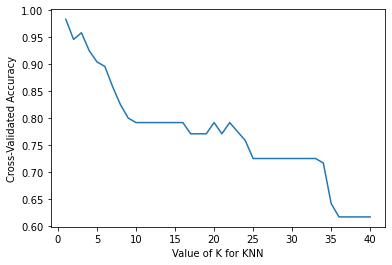

In [75]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=40)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()